In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import folium

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None) # display all columns, without limits

In [3]:
# Load the dataset
orders_df = pd.read_csv('dataset/olist_orders_dataset.csv')
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


### **Missing Values**

In [4]:
orders_df.isna().sum() # check for missing values

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

### **Duplicate Values**

In [5]:
orders_df.duplicated().sum() # check for duplicates

0

### **Unique Values**

In [6]:
pd.set_option('display.max_colwidth', None)

listItem = []
for col in orders_df.columns :
    listItem.append([col, orders_df[col].nunique(), orders_df[col].sort_values().unique()])

df_uniques_per_column = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'], data=listItem)
df_uniques_per_column.sort_values('Number of Unique', ascending=False)

,Column Name,Number of Unique,Unique Sample
0,order_id,99441,"[00010242fe8c5a6d1ba2dd792cb16214, 00018f77f2f0320c557190d7a144bdd3, 000229ec398224ef6ca0657da4fc703e, 00024acbcdf0a6daa1e931b038114c75, 00042b26cf59d7ce69dfabb4e55b4fd9, 00048cc3ae777c65dbb7d2a0634bc1ea, 00054e8431b9d7675808bcb819fb4a32, 000576fe39319847cbb9d288c5617fa6, 0005a1a1728c9d785b8e2b08b904576c, 0005f50442cb953dcd1d21e1fb923495, 00061f2a7bc09da83e415a52dc8a4af1, 00063b381e2406b52ad429470734ebd5, 0006ec9db01a64e59a68b2c340bf65a7, 0008288aa423d2a3f00fcb17cd7d8719, 0009792311464db532ff765bf7b182ae, 0009c9a17f916a706d71784483a5d643, 000aed2e25dbad2f9ddb70584c5a2ded, 000c3e6612759851cc3cbb4b83257986, 000e562887b1f2006d75e0be9558292e, 000e63d38ae8c00bbcb5a30573b99628, 000e906b789b55f64edcb1f84030f90d, 000f25f4d72195062c040b12dce9a18a, 001021efaa8636c29475e7734483457d, 0010b2e5201cc5f1ae7e9c6cc8f5bd00, 0010dedd556712d7bb69a19cb7bbd37a, 00119ff934e539cf26f92b9ef0cdfed8, 0011d82c4b53e22e84023405fb467e57, 00125cb692d04887809806618a2a145f, 00130c0eee84a3d909e75bc08c5c3ca1, 0013503b13da1eac686219390b7d641b, 00137e170939bba5a3134e2386413108, 001427c0ec99cf8af737bd88e92fd444, 00143d0f86d6fbd9f9b38ab440ac16f5, 0014ae671de39511f7575066200733b7, 0015ebb40fb17286bea51d4607c4733c, 00169e31ef4b29deaae414f9a5e95929, 0016dfedd97fc2950e388d2971d718c7, 0017afd5076e074a48f1f1a4c7bac9c5, 001862358bf858722e1e2ae000cfed8b, 0019c29108428acffd089c36103c9440, 001ab0a7578dd66cd4b0a71f5b6e1e41, 001ac194d4a326a6fa99b581e9a3d963, 001b76dd48a5b1eee3e87778daa40df8, 001c85b5f68d2be0cb0797afc9e8ce9a, 001d8f0e34a38c37f7dba2a37d4eba8b, 001daeb0eddc45b999bad0801ad9d273, 001dbc16dc51075e987543d23a0507c7, 001e7ba991be1b19605ca0316e7130f9, 001e7cf2ad6bef3ade12ebc56ceaf0f3, 0020262c8a370bd5a174ea6a2a267321, 0020a222f55eb79a372d0efee3cca688, 002175704e8b209f61b9ad5cfd92b60e, 00229e4e43f7a7e0b9dd819ad43268d3, 0025081dcf9330f9a5052ae82c6ce396, 00254baeb6c932b0a8aeead91fbd02b5, 00259a44fcad3fc0474329e925d14fc3, 0025c5d1a8ca53a240ec2634bb4492ea, 002611a77fe03d076285fd4ca95db77c, 002691433f09002ac9ca0c4e8dbb8ead, 0026a368634b6e6f34f33b1499773a30, 00275bce676303c3bfd7292aefdfa223, 00276d5c3491fbf55305e26891040df9, 002834535f7a609a5c68266f173fa59e, 0028de0ca693a1bb26448916a81105cc, 002955b0acc63d04f6724a31967e82bd, 0029c5db35ef291ce99d1262012e7daa, 0029f17cf0e7640c5cb6825af681303f, 002af7fa9eb99d1456bceb6a13d6fc0b, 002b430ff89b3a24c31a1170acbbedea, 002b4e6fa42cd4a22cc86abc18fe9c05, 002c9def9c9b951b1bec6d50753c9891, 002d040018d12a3853c059f7f23ab5b1, 002f16b7bc4530031b7d90f791b12d8a, 002f19a65a2ddd70a090297872e6d64e, 002f98c0f7efd42638ed6100ca699b42, 0030d783f979fbc5981e75613b057344, 0030ff924c38549807645976adeef2c0, 00310b0c75bb13015ec4d82d341865a4, 00324b3eda39ba5ecce3945823e3594c, 0032d07457ae9c806c79368d7d9ce96b, 003324c70b19a16798817b2b3640e721, 00335b686d693c7d72deeb12f8e89227, 00335f75ea6a4455b524a8dd177067f5, 00337fe25a3780b3424d9ad7c5a4b35e, 003423b755b562962a6225a8de40d12e, 00345f338696283410b7977d2e3efc89, 0035246a40f520710769010f752e7507, 0035c0b07126fe9c24a325216fb96064, 0035e6b7ade84b3f5b86bd49814793df, 0036757472ece3dde52fd4bfd929c90e, 0036887767dea4bd43b1a88cd0d9477a, 00378c6c981f234634c0b9d6128df6dd, 003822434f91204da0a51fe4cf2aba18, 0039500db36d50d7d0bfaf23723550f3, 003a7f59d7e08a9c61d9e2881fe6459c, 003a94f778ef8cfd50247c8c1b582257, 003cc6161d7a2593f2525cce0c330d32, 003d0634280ff3d1d3a54459349a6899, 003d804eef0e1b856881cd18e0cc0d4c, 003d9fc84ad902adf2265248b5ffe1a4, ...]"
1,customer_id,99441,"[00012a2ce6f8dcda20d059ce98491703, 000161a058600d5901f007fab4c27140, 0001fd6190edaaf884bcaf3d49edf079, 0002414f95344307404f0ace7a26f1d5, 000379cdec625522490c315e70c7a9fb, 0004164d20a9e969af783496f3408652, 000419c5494106c306a97b5635748086, 00046a560d407e99b969756e0b10f282, 00050bf6e01e69d5c0fd612f1bcfb69c, 000598caf2ef4117407665ac33275130, 0005aefbb696d34b3424dccd0a0e9fd0, 00062b33cb9f6fe976afdcff967ea74d, 00066ccbe787a588c52bd5ff404590e3, 00072d033fe2e59061ae5c3aff1a2be5, 0009a69b72033b2d0ec8c69fc70ef768,

### **Order Status**

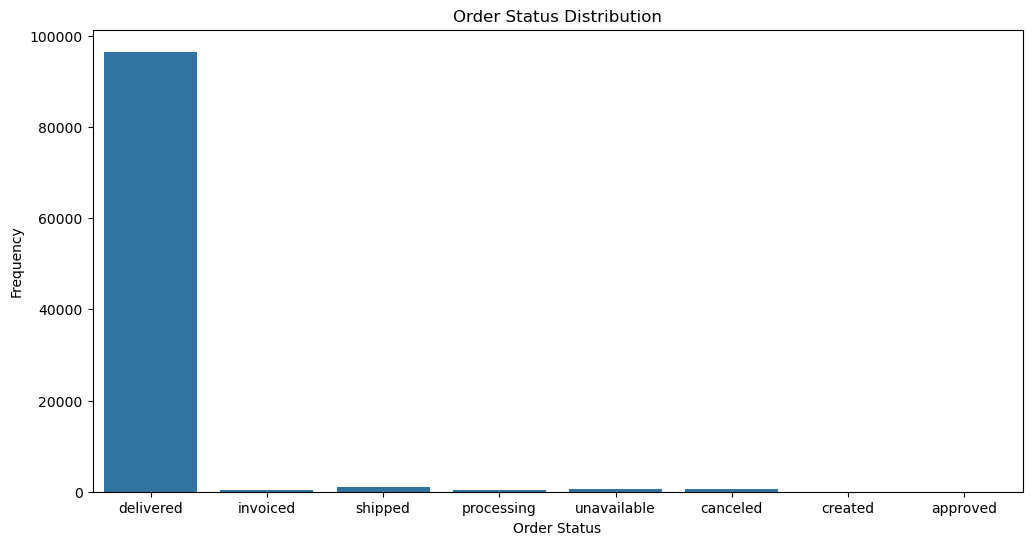

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(data=orders_df, x='order_status')
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Frequency')
plt.show()